<a href="https://colab.research.google.com/github/pu-bi/ITB-2022/blob/main/9%EC%A1%B0_%EC%95%84%EB%B9%84%ED%98%81_%EA%B8%B0%EB%A7%90_%ED%94%8C%EC%A0%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **9조: 와인 품질 예측하기**
- 데이터 출처
: **데이콘- 와인 품질 분류 경진대회**
(https://dacon.io/competitions/open/235610/overview/description)

 *별도의 수상작 및 오픈된 코드 없음.
- 데이터 설명: 와인 품질과, 그와 관련된 독립변수 12개에 대한 데이터
- 변수 종류 및 개수
 -  index 구분자
 - quality 품질
 - fixed acidity 산도
 - volatile acidity 휘발성산
 - citric acid 시트르산
 - residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
 - chlorides 염화물
 - free sulfur dioxide 독립 이산화황
 - total sulfur dioxide 총 이산화황
 - density 밀도
 - pH 수소이온농도
 - sulphates 황산염
 - alcohol 도수
 - type 종류

In [ ]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=a40eec1d10cd522f047bfeacc9efdcf531441d3ef3ac2f472e61839eea23d574
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 4.9 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [ ]:
import mglearn

##**데이터 불러오기 및 탐색**

In [ ]:
# 필요한 package 불러오기
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 데이터 불러오기
wine = pd.read_csv('https://raw.githubusercontent.com/fbalsrud/ITB2022/main/wine_train.csv', index_col='index') #'index' 변수 index로 불러오기

print(wine.columns)
display(wine.info())  # IV 1개('quality'), DV 총 12개('index' 제외)
display(wine)

Index(['quality', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'type'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null

None

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,,
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white


###데이터 전처리

In [ ]:
# object 변수 수치형 변환
from sklearn.preprocessing import LabelEncoder

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
encoder = LabelEncoder()
wine['type'] = encoder.fit_transform(wine['type']) # red = 0, white = 1

display(wine.head(5))

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,,
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1


6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64


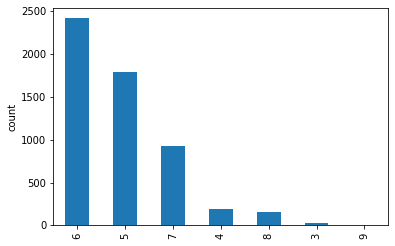

In [ ]:
# quality별 빈도수 확인
print(wine['quality'].value_counts())

wine['quality'].value_counts().plot.bar()
plt.ylabel('count')
plt.show()

# **분류모델 만들기**

## **의사결정나무 만들기**

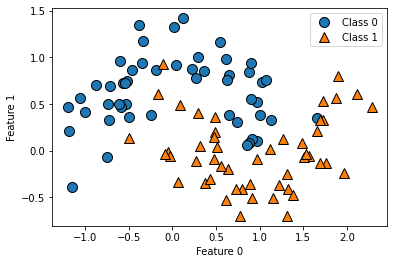

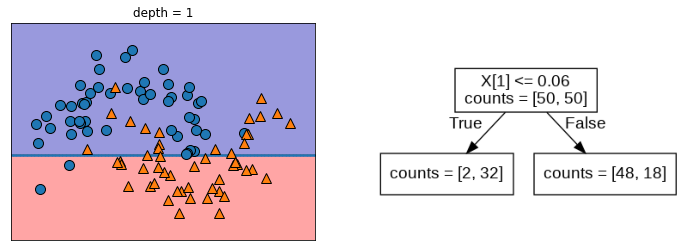

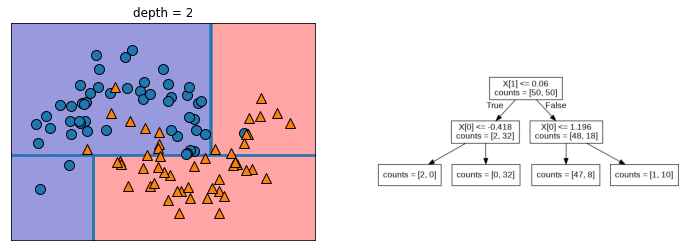

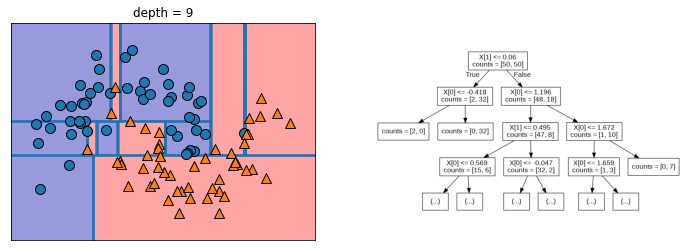

In [ ]:
# 의사결정나무 만드는 과정 
mglearn.plots.plot_tree_progressive()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = wine.iloc[:, 1:]  #12개 변수
y = wine.iloc[:, 0]   # target 변수 quality

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.591


In [ ]:
tree = DecisionTreeClassifier(max_depth=20, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test))) # 임의로 파라미터 적용시 0.591이상 정확도 도출하기 쉽지 않음.

학습용 데이터 정확도: 0.998
시험용 데이터 정확도: 0.587


In [ ]:
# graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "3", "4", "5", "6", "7", "8", "9"],
                feature_names=wine.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))   # 나무의 depth가 너무 깊고 복잡함. min_samples_leaf 제어 필요.

In [ ]:
# 최적파라미터 찾기 위해 그리드 서치 실행
from sklearn.model_selection import GridSearchCV

# depth 제어보다 최고 정확도 개선을 우선 목표로 삼음

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[20,21,22,23,24,25], 'random_state': [0, 42]}

grid_tree = GridSearchCV(tree, param_grid=parameters, cv=3, refit=True)
grid_tree.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_tree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 20, 'random_state': 0}",0.530568,7,0.519651,0.533479,0.538574
1,"{'max_depth': 20, 'random_state': 42}",0.531053,4,0.522562,0.537846,0.532751
2,"{'max_depth': 21, 'random_state': 0}",0.530810,6,0.516012,0.532023,0.544396
3,"{'max_depth': 21, 'random_state': 42}",0.531053,4,0.524017,0.539301,0.529840
4,"{'max_depth': 22, 'random_state': 0}",0.531295,1,0.518195,0.529840,0.545852
5,"{'max_depth': 22, 'random_state': 42}",0.530082,8,0.525473,0.541485,0.523290
6,"{'max_depth': 23, 'random_state': 0}",0.531053,3,0.512373,0.534934,0.545852
7,"{'max_depth': 23, 'random_state': 42}",0.530082,8,0.522562,0.544396,0.523290
8,"{'max_depth': 24, 'random_state': 0}",0.531295,1,0.512373,0.535662,0.545852
9,"{'max_depth': 24, 'random_state': 42}",0.528869,11,0.522562,0.540757,0.523290


In [ ]:
print('DecisionTreeCV 최적 파라미터:', grid_tree.best_params_)
print('DecisionTreeCV 최고 정확도: {0:.4f}'.format(grid_tree.best_score_))

DecisionTreeCV 최적 파라미터: {'max_depth': 22, 'random_state': 0}
DecisionTreeCV 최고 정확도: 0.5313


In [ ]:
# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_tree.score(X_test, y_test))) # 처음 만든 의사결정나무와(과적합) 동일 수치.

# depth 조절 시 늘 해당 수치 이하의 정확도 도출됨. decision tree의 정확도 개선은 무의미.

시험용 데이터 세트 정확도: 0.591


## **랜덤포레스트 만들기**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))  # decision tree 보다 개선된 정확도

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.668


## **그래디언트 부스팅 만들기**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.729
시험용 데이터 세트 정확도: 0.568


In [ ]:
# 나무 깊이 2로 제한
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))  # 정확도 오히려 낮아짐

학습 데이터 세트 정확도: 0.624
시험용 데이터 세트 정확도: 0.545


In [ ]:
# 나무 깊이 4로 증가
gbrt = GradientBoostingClassifier(random_state=0, max_depth=4)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test))) # 정확도 증가함. random forest 보다는 낮은 수치.

학습 데이터 세트 정확도: 0.823
시험용 데이터 세트 정확도: 0.597


In [ ]:
# 최적 파라미터 찾기 위한 그리드 서치
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3,4], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3, 4]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.547792,15,0.549491,0.538574,0.555313
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.568171,10,0.564047,0.562591,0.577875
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.574236,6,0.558224,0.569141,0.595342
3,"{'learning_rate': 0.1, 'max_depth': 4}",0.587821,1,0.580786,0.589520,0.593159
4,"{'learning_rate': 0.08, 'max_depth': 1}",0.546579,16,0.548763,0.540029,0.550946
5,"{'learning_rate': 0.08, 'max_depth': 2}",0.565260,11,0.559680,0.559680,0.576419
6,"{'learning_rate': 0.08, 'max_depth': 3}",0.571082,7,0.561135,0.563319,0.588792
7,"{'learning_rate': 0.08, 'max_depth': 4}",0.587336,2,0.577147,0.592431,0.592431
8,"{'learning_rate': 0.06, 'max_depth': 1}",0.545366,18,0.544396,0.537846,0.553857
9,"{'learning_rate': 0.06, 'max_depth': 2}",0.562106,12,0.556041,0.559680,0.570597


In [ ]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.1, 'max_depth': 4}
GridSearchCV 최고 정확도: 0.5878


In [ ]:
# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test))) # 그리드 서치하기 전과 동일한 정확도.

시험용 데이터 세트 정확도: 0.597


# **분류 모델 평가**
기존 분류모델의 낮은 정확도를 개선시키고, 정확도가 낮은 원인을 탐색

## **대안1: 독립변수 제한**
각 모델에서 공통적으로 나타난 중요변수 2개만을 기준으로 재분류.

In [ ]:
# 변수 중요도 시각화
import numpy as np

def plot_feature_importances_wine(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(wine.columns[1:])  # 12개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), wine.columns[1:])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) # Y 축 범위 지정 (-1 ~ 30)

변수의 중요도:
 [0.06647929 0.12140459 0.07493851 0.09132072 0.08667188 0.07989806
 0.0798195  0.06197578 0.0956937  0.09225668 0.14670562 0.00283567]


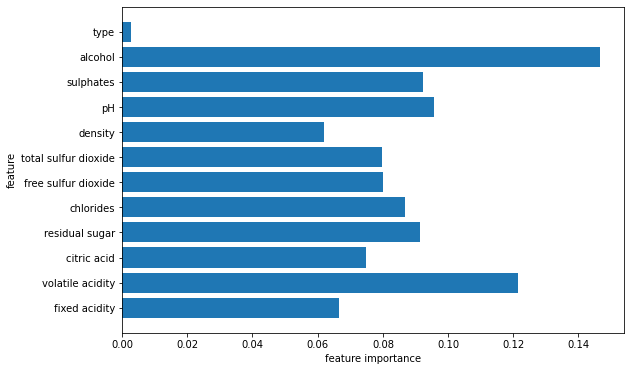

In [ ]:
# 의사결정나무 변수 중요도
result = tree.feature_importances_
print("변수의 중요도:\n", result)

plot_feature_importances_wine(tree)

변수의 중요도:
 [0.07616165 0.09973085 0.07733193 0.08405504 0.08677354 0.08660881
 0.09059531 0.09963246 0.08315304 0.0886544  0.1235994  0.00370356]


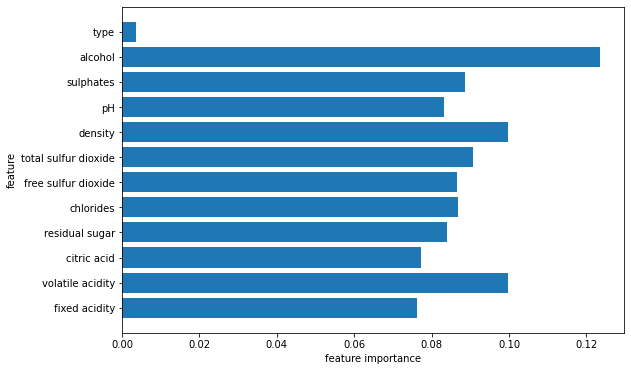

In [ ]:
# 랜덤포레스트 변수 중요도
result = forest.feature_importances_
print("변수의 중요도:\n", result)

plot_feature_importances_wine(forest)

변수의 중요도:
 [0.05143536 0.13304654 0.05123254 0.07774819 0.06295691 0.07703876
 0.07634986 0.08334582 0.05584141 0.08137523 0.24483912 0.00479027]


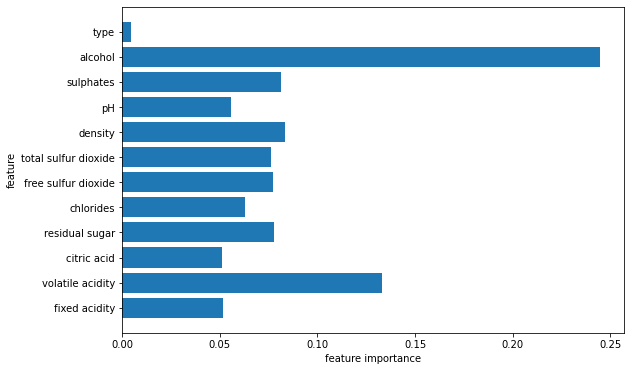

In [ ]:
# 그래디언트 부스팅 변수 중요도
result = gbrt.feature_importances_
print("변수의 중요도:\n", result)

plot_feature_importances_wine(gbrt) # 분석 결과 alcohol, volatile acidity 변수가 중요도 상위 2개 변수로 도출됨.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


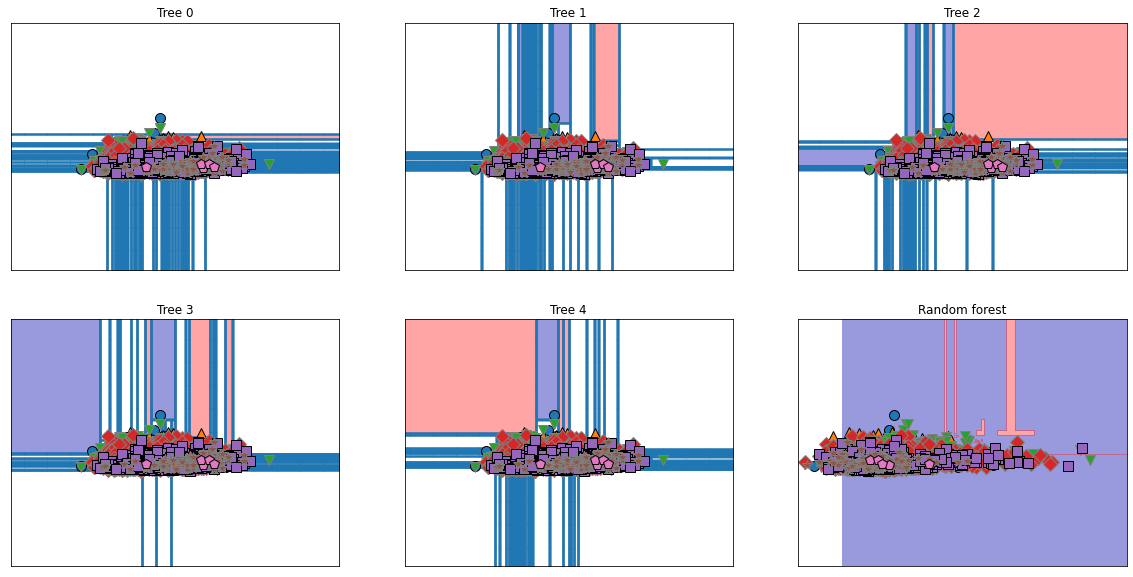

In [ ]:
# 기존 분석결과 정확도가 가장 높았던 random forest 대상으로 재분류 실시
from sklearn.ensemble import RandomForestClassifier

# 중요도 높았던 alcohol, volatile acidity 변수만 이용하여 5개의 나무를 만드는 예 
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train[['alcohol','volatile acidity']], y_train)

# 5개 나무 각각의 분류 경계를 그림
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X[['alcohol','volatile acidity']].values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X[['alcohol','volatile acidity']].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

In [ ]:
# 중요변수만 뽑아 생성하자 정확도 오히려 낮아짐. (기존 분석 최대 정확도: 0.668)
print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train[['alcohol','volatile acidity']], y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test[['alcohol','volatile acidity']], y_test)))

학습용 데이터 세트 정확도: 0.740
시험용 데이터 세트 정확도: 0.538


## **대안2: 독립변수 수정**

1안) 임의로 독립변수 제거하여 정확도 향상 여부 검토

In [ ]:
# 'pH', 'chlorides' 칼럼 제외한 wine_1 데이터프레임 신규 생성 
wine_1 = wine.drop(columns=["pH", "chlorides"])
display(wine_1.head(5))

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type
index,,,,,,,,,,,
0,5,5.6,0.695,0.06,6.8,9.0,84.0,0.99432,0.44,10.2,1
1,5,8.8,0.610,0.14,2.4,10.0,42.0,0.99690,0.59,9.5,0
2,5,7.9,0.210,0.39,2.0,21.0,138.0,0.99176,0.52,10.9,1
3,6,7.0,0.210,0.31,6.0,29.0,108.0,0.99390,0.50,10.8,1
4,6,7.8,0.400,0.26,9.5,32.0,178.0,0.99550,0.43,10.9,1


In [ ]:
# 신규 데이터 프레임으로(wine_1) 의사결정나무(tree_1) 만들기
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = wine_1.iloc[:, 1:] 
y = wine_1.iloc[:, 0]  #target 변수: 퀄리티(위에서 index 칼럼 제거해서 quality 칼럼이 맨 앞)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree_1 = DecisionTreeClassifier(random_state=0)  
tree_1.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree_1.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree_1.score(X_test, y_test)))  #기존 데이터프레임보다(0.591) 정확도 소폭 상승.

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.596


In [ ]:
# 나무 depth 4로 제한
tree_1 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_1.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree_1.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree_1.score(X_test, y_test)))  #나무 깊이 제한하자 정확도 다시 감소.

학습용 데이터 정확도: 0.566
시험용 데이터 정확도: 0.532


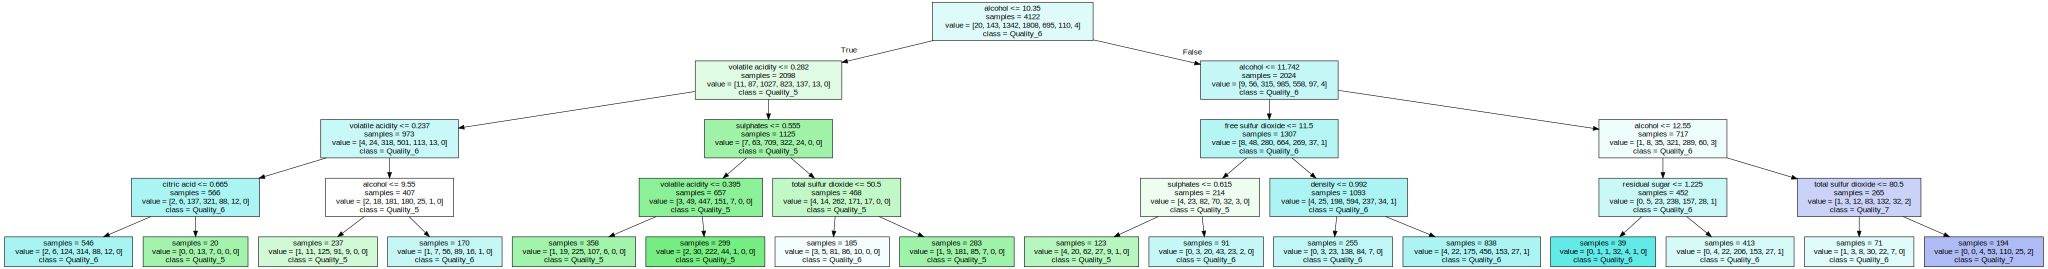

In [ ]:
# wine_1 의사결정나무 시각화
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(tree, out_file="tree.dot", class_names=[ "Quality_3", "Quality_4", "Quality_5", "Quality_6", "Quality_7", "Quality_8", "Quality_9"],
                feature_names=X.columns, impurity=False, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [ ]:
# 신규 데이터 프레임으로(wine_1) 랜덤포레스트(forest_1) 만들기
from sklearn.ensemble import RandomForestClassifier

# wine_1 데이터프레임('pH', 'chlorides' 제외한 10개 변수)으로 10개의 나무를 생성함
## 100개 생성 시 과적합 문제 발생
forest_1 = RandomForestClassifier(n_estimators=10, random_state=0)
forest_1.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest_1.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest_1.score(X_test, y_test))) # 기존 데이터프레임보다(0.668) 정확도 낮아짐.

학습용 데이터 세트 정확도: 0.983
시험용 데이터 세트 정확도: 0.643


In [ ]:
# 신규 데이터 프레임으로(wine_1) 그래디언트 부스팅(gbrt_1) 만들기
from sklearn.ensemble import GradientBoostingClassifier

gbrt_1 = GradientBoostingClassifier(random_state=0)
gbrt_1.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt_1.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt_1.score(X_test, y_test))) # 기존 데이터프레임보다(0.597) 정확도 낮아짐.

학습용 데이터 세트 정확도: 0.724
시험용 데이터 세트 정확도: 0.565


In [ ]:
# 정확도 향상 위한 파라미터 조정 (나무 깊이 4로 제한)
gbrt_1 = GradientBoostingClassifier(random_state=0, max_depth=4)
gbrt_1.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt_1.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt_1.score(X_test, y_test))) # 정확도 소폭 상승했으나 여전히 기존 df보다 정확도 낮음.

# 1안 적용 결과, 랜덤포레스트와 그래디언트 부스팅에서는 정확도 감소했으나 의사결정나무에서는 정확도 향상하는 모습 보임.
## 랜덤포레스트의 정확도 향상 유의미하다고 판단해 2안으로 진행.

학습 데이터 세트 정확도: 0.811
시험용 데이터 세트 정확도: 0.591


2안) 가장 중요도 낮았던 독립변수 제거하여 정확도 검토

In [ ]:
# 변수 별 중요도 순위 파악
result = tree.feature_importances_
print("변수의 중요도:\n", result)

res = pd.DataFrame(result)
res["name"] = wine.columns[1:]
display(res.info())

display(res.sort_values(by= 0, ascending=False))

변수의 중요도:
 [0.06647929 0.12140459 0.07493851 0.09132072 0.08667188 0.07989806
 0.0798195  0.06197578 0.0956937  0.09225668 0.14670562 0.00283567]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   name    12 non-null     object 
dtypes: float64(1), object(1)
memory usage: 320.0+ bytes


None

,0,name
10,0.146706,alcohol
1,0.121405,volatile acidity
8,0.095694,pH
9,0.092257,sulphates
3,0.091321,residual sugar
4,0.086672,chlorides
5,0.079898,free sulfur dioxide
6,0.079820,total sulfur dioxide
2,0.074939,citric acid
0,0.066479,fixed acidity


In [ ]:
result = forest.feature_importances_
print("변수의 중요도:\n", result)

res = pd.DataFrame(result)
res["name"] = wine.columns[1:]
display(res.info())

display(res.sort_values(by= 0, ascending=False))

변수의 중요도:
 [0.07616165 0.09973085 0.07733193 0.08405504 0.08677354 0.08660881
 0.09059531 0.09963246 0.08315304 0.0886544  0.1235994  0.00370356]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   name    12 non-null     object 
dtypes: float64(1), object(1)
memory usage: 320.0+ bytes


None

,0,name
10,0.123599,alcohol
1,0.099731,volatile acidity
7,0.099632,density
6,0.090595,total sulfur dioxide
9,0.088654,sulphates
4,0.086774,chlorides
5,0.086609,free sulfur dioxide
3,0.084055,residual sugar
8,0.083153,pH
2,0.077332,citric acid


In [ ]:
result = gbrt.feature_importances_
print("변수의 중요도:\n", result)

res = pd.DataFrame(result)
res["name"] = wine.columns[1:]
display(res.info())

display(res.sort_values(by= 0, ascending=False))

변수의 중요도:
 [0.05143536 0.13304654 0.05123254 0.07774819 0.06295691 0.07703876
 0.07634986 0.08334582 0.05584141 0.08137523 0.24483912 0.00479027]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   name    12 non-null     object 
dtypes: float64(1), object(1)
memory usage: 320.0+ bytes


None

,0,name
10,0.244839,alcohol
1,0.133047,volatile acidity
7,0.083346,density
9,0.081375,sulphates
3,0.077748,residual sugar
5,0.077039,free sulfur dioxide
6,0.076350,total sulfur dioxide
4,0.062957,chlorides
8,0.055841,pH
0,0.051435,fixed acidity


In [ ]:
# 3개 모델 공통 중요도 하위 3개 변수 제거하고 모델 별 정확도 검토

# 'type', 'citric acid', 'fixed acidity' 변수 제거한 새 데이터프레임(wine_2) 생성
wine_2 = wine[['quality','alcohol','volatile acidity','density','sulphates','residual sugar','free sulfur dioxide','total sulfur dioxide', 'chlorides','pH']]

display(wine_2.info())  # IV 1개('quality'), DV 총 9개
display(wine_2.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5497 entries, 0 to 5496
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   alcohol               5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   density               5497 non-null   float64
 4   sulphates             5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   chlorides             5497 non-null   float64
 9   pH                    5497 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 472.4 KB


None

,quality,alcohol,volatile acidity,density,sulphates,residual sugar,free sulfur dioxide,total sulfur dioxide,chlorides,pH
index,,,,,,,,,,
0,5,10.2,0.695,0.99432,0.44,6.8,9.0,84.0,0.042,3.44
1,5,9.5,0.610,0.99690,0.59,2.4,10.0,42.0,0.067,3.19
2,5,10.9,0.210,0.99176,0.52,2.0,21.0,138.0,0.057,3.05
3,6,10.8,0.210,0.99390,0.50,6.0,29.0,108.0,0.046,3.26
4,6,10.9,0.400,0.99550,0.43,9.5,32.0,178.0,0.059,3.04


In [ ]:
# 신규 데이터 프레임으로(wine_2) 의사결정나무(tree_2) 만들기
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = wine_2.iloc[:, 1:]  #9개 변수
y = wine_2.iloc[:, 0]   # target 변수 quality

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree_2 = DecisionTreeClassifier(random_state=0)  
tree_2.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree_2.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree_2.score(X_test, y_test))) #기존 데이터프레임보다(0.591) 정확도 소폭 상승.

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.593


In [ ]:
# 과적합 해결하기 위해 나무 깊이 제한
tree_2 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_2.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree_2.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree_2.score(X_test, y_test))) # 파라미터 조절 결과 depth 줄일수록 정확도 급감. 기존 데이터프레임과 마찬가지 경향.

학습용 데이터 정확도: 0.564
시험용 데이터 정확도: 0.532


In [ ]:
# 신규 데이터 프레임으로(wine_2) 랜덤포레스트(forest_2) 만들기
from sklearn.ensemble import RandomForestClassifier

# wine_2 데이터프레임으로 10개의 나무를 생성함
forest_2 = RandomForestClassifier(n_estimators=10, random_state=0)
forest_2.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest_2.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest_2.score(X_test, y_test))) # 기존 데이터프레임보다(0.668) 정확도 낮아짐.

학습용 데이터 세트 정확도: 0.982
시험용 데이터 세트 정확도: 0.639


In [ ]:
# 신규 데이터 프레임으로(wine_2) 그래디언트 부스팅(gbrt_2) 만들기
from sklearn.ensemble import GradientBoostingClassifier

gbrt_2 = GradientBoostingClassifier(random_state=0)
gbrt_2.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt_2.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt_2.score(X_test, y_test))) # 기존 데이터프레임보다(0.597) 정확도 낮지만 1안의 결과보다는 개선.

학습용 데이터 세트 정확도: 0.716
시험용 데이터 세트 정확도: 0.572


In [ ]:
# 정확도 향상 위한 파라미터 조정 (나무 깊이 4로 제한)
gbrt_2 = GradientBoostingClassifier(random_state=0, max_depth=4)
gbrt_2.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt_2.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt_2.score(X_test, y_test))) # 1안의 개선결과와 동일한 시험용 데이터 세트 정확도 결과.

#독립변수 수정 결과 의사결정나무의 경우 정확도가 향상되었지만 나머지에서는 유의미한 결과를 얻지는 못했음.
#정확도와 변수의 중요도 간에는 상관관계 없음을 확인.
#독립변수를 제거하는 것이 오히려 정확도를 떨어뜨림. 독립변수의 개수는 분류모델의 정확도를 떨어뜨리는 요인이 아님.
#오히려 정확한 분류를 위해 필요함.

학습 데이터 세트 정확도: 0.807
시험용 데이터 세트 정확도: 0.591


## **대안3: 종속변수 수정**
기존의 종속변수 'quality'를 multiple classes가 아닌 분류모델에 적합한 이진분류로 수정 후 재분류

In [ ]:
#wine의 quality 변수를 5를 기준으로 5 초과는 G(좋음), 5 이하는 B(나쁨)으로 수정
wine['quality'] = np.where(wine['quality'] > 5, 'G', 'B')
wine

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,,
0,B,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,B,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,B,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,G,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,G,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,B,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,1
5493,G,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,1
5494,G,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,1


G    3497
B    2000
Name: quality, dtype: int64


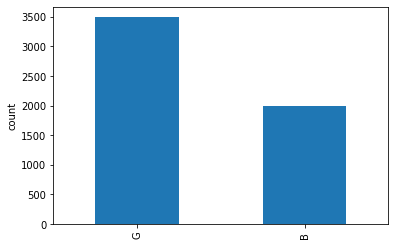

In [ ]:
# quality별 빈도수 확인
print(wine['quality'].value_counts())

wine['quality'].value_counts().plot.bar()
plt.ylabel('count')
plt.show()

In [ ]:
# 의사결정나무 생성 과정

X = wine.drop('quality', axis = 1)
y = wine['quality']

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))   # 기존 데이터프레임보다도 정확도 훨씬 향상됨.

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.771


In [ ]:
# max_depth 설정으로 과적합 방지
tree = DecisionTreeClassifier(max_depth=15, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.982
시험용 데이터 정확도: 0.777


In [ ]:
# 랜덤포레스트 생성 과정

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.842


In [ ]:
# max_depth 설정으로 과적합 방지
forest = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=10)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.918
시험용 데이터 세트 정확도: 0.805


In [ ]:
# 그래디언트 부스팅 생성 과정

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

# 세 분류모델 모두에서, DV의 class를 multiple에서 binary로 수정하자, 정확도 대폭 향상됨.

학습용 데이터 세트 정확도: 0.812
시험용 데이터 세트 정확도: 0.768


### **그리드 서치**
분류모델 별 최적파라미터 찾기 위해 그리드서치 실행

In [ ]:
# 의사결정나무 그리드서치
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,3,5,10,15],'min_samples_leaf':[1,2,3]}

init_dt = DecisionTreeClassifier(random_state=0)
grid_dt = GridSearchCV(init_dt, param_grid=parameters, cv=3, refit=True)
print(grid_dt)

grid_dt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 3, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 3]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_leaf': 1}",0.677963,13,0.684175,0.670532,0.679181
1,"{'max_depth': 1, 'min_samples_leaf': 2}",0.677963,13,0.684175,0.670532,0.679181
2,"{'max_depth': 1, 'min_samples_leaf': 3}",0.677963,13,0.684175,0.670532,0.679181
3,"{'max_depth': 3, 'min_samples_leaf': 1}",0.732093,8,0.725784,0.727149,0.743345
4,"{'max_depth': 3, 'min_samples_leaf': 2}",0.732093,8,0.725784,0.727149,0.743345
5,"{'max_depth': 3, 'min_samples_leaf': 3}",0.732775,7,0.725784,0.729195,0.743345
6,"{'max_depth': 5, 'min_samples_leaf': 1}",0.744602,2,0.726467,0.745566,0.761775
7,"{'max_depth': 5, 'min_samples_leaf': 2}",0.744375,3,0.726467,0.745566,0.761092
8,"{'max_depth': 5, 'min_samples_leaf': 3}",0.745512,1,0.727149,0.748295,0.761092
9,"{'max_depth': 10, 'min_samples_leaf': 1}",0.738914,4,0.731924,0.739427,0.745392


In [ ]:
print('GridSearchCV 최적 파라미터:', grid_dt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dt.best_score_))  #그리드서치 이전이 더 높은 정확도(0.777)

GridSearchCV 최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 3}
GridSearchCV 최고 정확도: 0.7455


In [ ]:
# 랜덤포레스트 그리드서치
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,3,5,10,15],'n_estimators':[50,100,150,200]}

init_rf = GradientBoostingClassifier(random_state=0)
grid_rf = GridSearchCV(init_rf, param_grid=parameters, cv=3, refit=True)
print(grid_rf)


grid_rf.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_rf = pd.DataFrame(grid_rf.cv_results_)
scores_rf[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'max_depth': [1, 3, 5, 10, 15],
                         'n_estimators': [50, 100, 150, 200]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'n_estimators': 50}",0.741645,20,0.731241,0.739427,0.754266
1,"{'max_depth': 1, 'n_estimators': 100}",0.746878,16,0.729877,0.739427,0.771331
2,"{'max_depth': 1, 'n_estimators': 150}",0.746879,15,0.731241,0.736698,0.772696
3,"{'max_depth': 1, 'n_estimators': 200}",0.749607,13,0.730559,0.747613,0.770648
4,"{'max_depth': 3, 'n_estimators': 50}",0.765072,12,0.748977,0.760573,0.785666
5,"{'max_depth': 3, 'n_estimators': 100}",0.768027,11,0.756480,0.766712,0.780887
6,"{'max_depth': 3, 'n_estimators': 150}",0.770756,10,0.761255,0.766030,0.784983
7,"{'max_depth': 3, 'n_estimators': 200}",0.772575,9,0.762619,0.768076,0.787031
8,"{'max_depth': 5, 'n_estimators': 50}",0.782353,8,0.774216,0.785812,0.787031
9,"{'max_depth': 5, 'n_estimators': 100}",0.790769,7,0.779673,0.788540,0.804096


In [ ]:
print('GridSearchCV 최적 파라미터:', grid_rf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_rf.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 10, 'n_estimators': 200}
GridSearchCV 최고 정확도: 0.8015


In [ ]:
# 그래디언트 부스팅 그리드서치
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3,4,5], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)

grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_gbrt = pd.DataFrame(grid_gbrt.cv_results_)
scores_gbrt[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3, 4, 5]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.746878,20,0.729877,0.739427,0.771331
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.758476,15,0.738063,0.761255,0.776109
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.768027,8,0.756480,0.766712,0.780887
3,"{'learning_rate': 0.1, 'max_depth': 4}",0.778034,5,0.764666,0.775580,0.793857
4,"{'learning_rate': 0.1, 'max_depth': 5}",0.790769,1,0.779673,0.788540,0.804096
5,"{'learning_rate': 0.08, 'max_depth': 1}",0.745513,21,0.729877,0.742156,0.764505
6,"{'learning_rate': 0.08, 'max_depth': 2}",0.759159,14,0.739427,0.756480,0.781570
7,"{'learning_rate': 0.08, 'max_depth': 3}",0.765527,11,0.746248,0.763302,0.787031
8,"{'learning_rate': 0.08, 'max_depth': 4}",0.778262,4,0.758527,0.780355,0.795904
9,"{'learning_rate': 0.08, 'max_depth': 5}",0.789859,2,0.777626,0.793315,0.798635


In [ ]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.1, 'max_depth': 5}
GridSearchCV 최고 정확도: 0.7908


##교차 검증 정확도 비교
'대안3'을 기준으로 교차 검증 시행해 정확도를 기준으로 가장 적합한 분류모델을 선정.

In [ ]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean()))

Accuracy
Decision tree:  [0.775      0.75       0.75454545 0.79772727 0.775      0.75454545
 0.74090909 0.76309795 0.79726651 0.77676538]
Random forest:  [0.80227273 0.79090909 0.79545455 0.79318182 0.79090909 0.78636364
 0.79772727 0.81093394 0.8428246  0.7881549 ]
Gradient boosting:  [0.78863636 0.76363636 0.74772727 0.77727273 0.74772727 0.77045455
 0.775      0.78132118 0.80865604 0.76309795]
Accuracy mean
Decision tree :0.768
Random forest :0.800
Gradient boosting :0.772


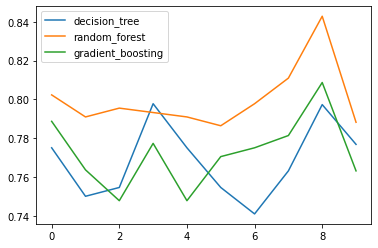

In [ ]:
# 정확도 평가 결과 시각화
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
            ['gradient_boosting',gbrt_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

# 세 모델 모두 종합했을 때 random forest가 가장 높은 정확도를 보임.
# '대안3'의 그리드서치에서도 마찬가지의 결과 보임.

# **인사이트 도출**

1. 해당 데이터 분석에 가장 적합했던 모델은 랜덤포레스트.

2. 와인품질에 가장 중요한 변수는 알코올.

3. **추가 분석 방향**: 선정한 모델 바탕으로 외부데이터 분석을 위해 predict 함수 사용하여 추가 분석 및 모델 실제 활용 가능.

4. **분류/예측모델 활용 방안: 비즈니스 모델(B2B서비스)**
- 와인생산공장에 와인 품질 분류 서비스 제공

  (생산 와인 목표 품질 도달 여부를 확인)
- 와인제조업체의 마케팅 기능을 보조.

  (제품포지셔닝: 제조 목표로 하는 와인 품질을 평가,
   적절한 가격 책정 기준을 제공)